# [Linear Regression (With Scikit-Learn)](https://towardsdatascience.com/linear-regression-detailed-view-ea73175f6e86)

   1. [Scikit-Learn Linear Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
   2. [Scikit-Learn LR Score](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score)
   3. [Mean Square Error](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)
   4. [Cross Validation Score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
# Importing sales and advertising channels data
adv = pd.read_csv('../../data/advertising.csv')
adv.head()

,TV,Radio,Newspaper,Sales,Region
0,230.1,37.8,69.2,22.1,1
1,44.5,39.3,45.1,10.4,1
2,17.2,45.9,69.3,9.3,1
3,151.5,41.3,58.5,18.5,1
4,180.8,10.8,58.4,12.9,1


In [5]:
# Split data into train and test

train, test = train_test_split(adv, test_size=0.3, random_state=1)


### Plot the Radio spending against the Sales

In [9]:
train.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales', 'Region'], dtype='object')

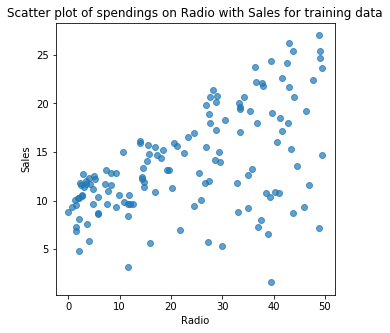

In [20]:
plt.figure(figsize=(5,5))

plt.scatter(train['Radio'], train['Sales'], alpha=0.7)

# Plot the raw data

plt.xlabel("Radio")
plt.ylabel("Sales")
plt.title('Scatter plot of spendings on Radio with Sales for training data')

plt.show()

### Plot the Newspaper spending against the Sales

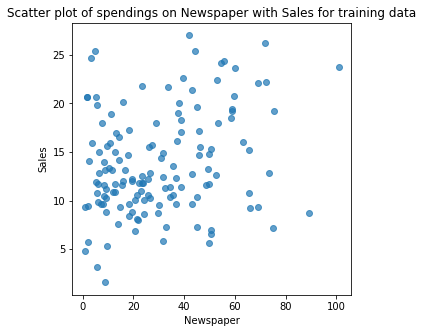

In [25]:
plt.figure(figsize=(5,5))


plt.scatter(train['Newspaper'], train['Sales'], alpha=0.7)



  # Plot the raw data

plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.title('Scatter plot of spendings on Newspaper with Sales for training data')

plt.show()

### Plot the TV spending against the Sales

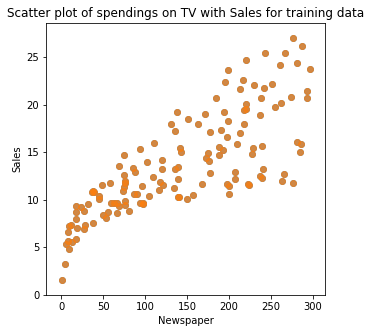

In [48]:
plt.figure(figsize=(5,5))




plt.scatter(train['TV'], train['Sales'], alpha=0.7)

plt.scatter(train.TV, train.Sales, alpha=0.7)



# Plot the raw data

plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.title('Scatter plot of spendings on TV with Sales for training data')

plt.show()

### Plot the Region against the Sales

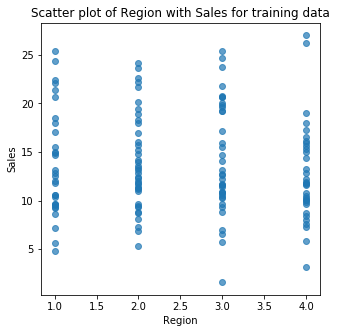

In [28]:
plt.figure(figsize=(5,5))

plt.scatter(train['Region'], train['Sales'], alpha=0.7)


# Plot the raw data

plt.xlabel("Region")
plt.ylabel("Sales")
plt.title('Scatter plot of Region with Sales for training data')

plt.show()

### Fitting a Model with `LinearRegression()`

In [29]:
# Fit a linear regression model using OLS (Order of Least Squares)

from sklearn.linear_model import LinearRegression

# Reference: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


In [30]:
slm = LinearRegression()

In [31]:
slm.fit(train['Radio'][:,np.newaxis], train['Sales'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
# Evaluate the output for the model fitted on the training data

intercept = slm.intercept_
intercept

9.440936561425886

In [33]:
coef = slm.coef_
coef

array([0.1874808])

In [39]:
score = slm.score(test['Radio'][:,np.newaxis], test['Sales']) 
score

0.41293932917162335

In [36]:
# print the results.

print('Linear Regression model score for the training data is {}'.format(score))
print('Linear Regression model coeficient for the training data is {}'.format(coef))
print('Linear Regression model intercept for the training data is {}'.format(intercept))

# Reference: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

Linear Regression model score for the training data is 0.41293932917162335
Linear Regression model coeficient for the training data is [0.1874808]
Linear Regression model intercept for the training data is 9.440936561425886


### EXERCISE: (10 min)
1. Given coefficient estimates, predict the y-value for `train.TV` & `train.Newspaper`
2. Create a scatter plot that also shows the data and the line of best fit

***Hint***: Use the following convention `plt.plot([x_min, x_max], [y_min, y_max])` and `plt.scatter(x, y)` next to each other

In [44]:
slm2 = LinearRegression()

In [45]:
slm2.fit(train['Newspaper'][:,np.newaxis], train['Sales'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
slm2.intercept_

11.82966888487788

In [47]:
slm2.score(test['Newspaper'][:,np.newaxis], test['Sales'])

-0.024953278429509007

In [49]:
import seaborn as sns

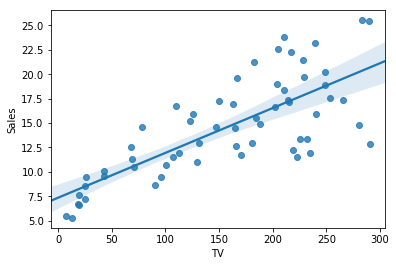

In [54]:
sns.regplot(test['TV'], test['Sales']);

In [60]:
slm3 = LinearRegression()
slm3.fit(train[['Radio', 'TV', 'Newspaper']], train['Sales'])
slm3.score(test[['Radio', 'TV', 'Newspaper']], test['Sales'])

0.9224605706201435

In [58]:
slm3.intercept_

2.9372157346906107

In [59]:
slm3.coef_

array([0.17658644, 0.04695205, 0.00185115])

In [ ]:
# Evaluate the fit of the model based off of the training set


from sklearn.metrics import mean_squared_error
# Reference: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html



In [ ]:
# print the results
print('Mean sqauared error for Linear Regression model is {}'.format(mse))

In [ ]:
# Evaluate the model fit based off of cross validation

from sklearn.model_selection import cross_val_score
# Reference: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html




In [ ]:
# print the results.
 print('Mean squared cross validation score for Linear Regression model is {}'.format(mscvs))

### EXERCISE: (10 min)
1.  Run a multiple regression with Radio and TV. 
    + Which coefficient has a higher value?
    + What does this suggest practically?
2.  Calculate the 5-fold CV RMSE. Is it better or worse than before?

In [ ]:
# 1) 
# Evaluate the fit of the model based off of the training set

# 2)
# Evaluate the model fit based off of cross validation

### INTERACTION TERMS
**What:** Interaction measure the combined effect of two variables acting together

**Why:**  This is a way to make predictions and inferences when two input variables are correlated with each other

---

**Note:** Whenever you include an interaction terms, it is conventional to include the main effects as well

In [61]:
# Creating a interaction variable using expenses on Radio and TV

train['Radio_TV']= train['Radio']*train['TV']
lmi = LinearRegression()

# Fitting the model using new interaction variable created


/Users/austinlasseter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [62]:
lmi.fit(train[['TV', 'Radio', 'Radio_TV']], train['Sales'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
lmi.coef_

array([0.01861055, 0.02153867, 0.00111581])

In [65]:

test['Radio_TV']= test['Radio']*test['TV']
lmi.score(test[['TV', 'Radio', 'Radio_TV']], test['Sales'])

/Users/austinlasseter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0.9794838368850284

### EXERCISE: (10 min)
1. Check to see if any interaction terms are worth including in the model